Here we are going to work on a draft for a function that takes as inputs two lists of matches. The original GS matches and the max_matches and looks at how long the cycles are. 

In [1]:
from multi_funcs import *
from funcs import *
from tarjan_alg import *

In [64]:
preferences = mdf_np(1000, 10)
preferences2 = preferences.copy()
matches, _ = run_gale_shapley(preferences2, k=10)
mwm, _,x1,x2 = get_max_weight_matching(preferences, matches, 1000,10)

In [65]:
original_match = dict(x1)

In [66]:
difference = dict(x2.difference(x1))
difference = {difference[i]:i for i in difference}

In [67]:
explored = []
unexplored = list(difference.keys())
cycle_lengths = []
cycles = []

while len(unexplored) != 0:
    current_node = unexplored[0]
    current_cycle = []
    while current_node not in current_cycle:
        current_cycle.append(current_node)
        explored.append(current_node)
        unexplored.remove(current_node)
        matched_school = difference[current_node]
        current_node = original_match[matched_school]
    cycle_lengths.append(len(current_cycle))
    cycles.append(current_cycle)

In [68]:
cycle_lengths

[255, 9, 31, 4, 16]

In [71]:
def len_cycles(x1, x2):
    '''
    This function takes as inputs the results from the Gale-Shapley and the Max Matching and returns the length of the implied cycles,
    as well as the cycles themselves. 
    '''
    original_match = dict(x1)
    difference = dict(x2.difference(x1))
    difference = {difference[i]:i for i in difference} # reverse the dictionary for ease of use
    
    explored = [] # initiate list of explored nodes
    unexplored = list(difference.keys()) # initiate list of unexplored nodes
    cycle_lengths = [] # initiate list of cycle lengths
    cycles = [] # initiate list of cycles

    while len(unexplored) != 0:
        current_node = unexplored[0] # start with first unexplored node 
        current_cycle = [] # initiate list of nodes in current cycle
        while current_node not in current_cycle: # condition is that we've not already visited this node
            current_cycle.append(current_node) # add the current node to our current cycle
            explored.append(current_node) # add the current node to our list of explored nodes
            unexplored.remove(current_node) # remove the current node from our list of unexplored nodes
            matched_school = difference[current_node] # find the school that the current node is matched to
            current_node = original_match[matched_school] # find the student that the school was matched to originally. Then repeat with that node.
        cycle_lengths.append(len(current_cycle))  # once we've found a cycle, add the length of the cycle to our list of cycle lengths
        cycles.append(current_cycle) # once we've found a cycle, add the cycle to our list of cycles

    return cycle_lengths, cycles
        

Now I just need a to create some histograms. Maybe with some bins etc... 

I guess we could just make one mega list of these things? so like keep getting the results, then appending them. Then we would do the histogram. 

In [48]:
results = gs_f_simulate_nx_max(5000, 1000, 10)

In [49]:
df = make_df_max_match_length(1000, 10, results)

In [50]:
df = df.groupby('cycle_lengths', as_index=False).count()

In [51]:
df['n_agents_in_cycle_of_size_x'] = df['cycle_lengths'] * df['n']

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='cycle_lengths', ylabel='Count'>

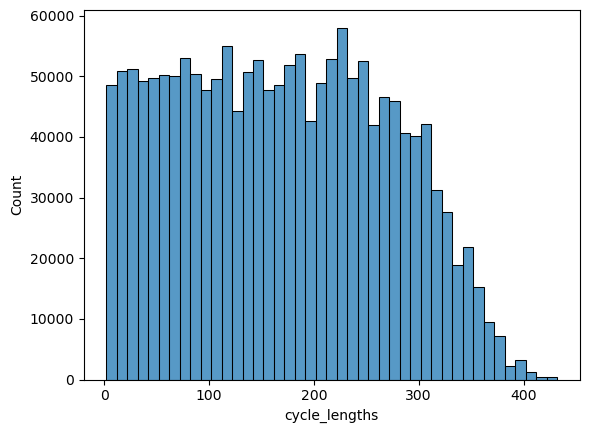

In [53]:
sns.histplot(df, x="cycle_lengths", weights='n_agents_in_cycle_of_size_x', binwidth=10, kde=False)

In [2]:
ks = [4,6,8]
for k in ks:
    results = gs_f_simulate_nx_max_lengths(10000, 1000, k)
    df = make_df_max_match_length(1000, k, results, save=True)

In [5]:
import os
os.getcwd()

'c:\\Users\\v-kirdwivedi\\Documents\\GitHub\\MatchingAlgorithm'

In [50]:
df = pd.read_csv('data/simulations/max_matches_1000_4_6_8/n_1000_k_8_max_diff.csv')

In [51]:
df

,Unnamed: 0,n,k,n_changes,n_matches,percent_changed
0,0,1000,8,217,961,0.225806
1,1,1000,8,160,951,0.168244
2,2,1000,8,198,950,0.208421
3,3,1000,8,228,960,0.237500
4,4,1000,8,205,953,0.215110
...,...,...,...,...,...,...
9995,9995,1000,8,210,948,0.221519
9996,9996,1000,8,193,943,0.204666
9997,9997,1000,8,230,950,0.242105
9998,9998,1000,8,221,952,0.232143


In [30]:
df = df.groupby('cycle_lengths', as_index=False).count()
df['n_agents_in_cycle_of_size_x'] = df['cycle_lengths'] * df['n']

<Axes: xlabel='n_changes', ylabel='Count'>

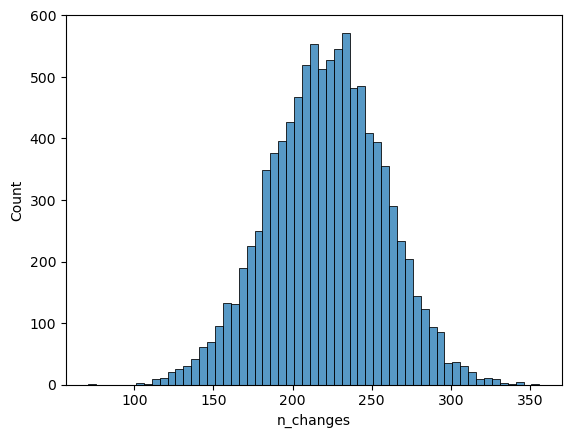

In [52]:
sns.histplot(df, x="n_changes", binwidth=5, kde=False)

In [32]:
for k in ks:
    results = gs_f_simulate_nx_max(10000, 1000, k)
    df = make_df_max_match(1000, k, results, save=True)

Now need to expand this to more n, k. Also need to start from EADAM before then progressing onto the max matching stuff. 